<a href="https://colab.research.google.com/github/iamkishan98/Deep-learning-assignments/blob/master/Augset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/My Drive/Deep Learning Course 2020/classification data/')
print(os.getcwd())

/content/drive/My Drive/Deep Learning Course 2020/classification data


In [3]:
import numpy as np
from matplotlib import pyplot as plt
aug_xtrain = np.load("Aug_PCB/s_x_train.npy")
aug_ytrain = np.load("Aug_PCB/s_y_train.npy")
print(aug_xtrain.shape)
print(aug_ytrain.shape)

(5040, 300, 300, 3)
(5040,)


Using TensorFlow backend.


1.0 1.0
0.0 0.0
0.20878915
0.20782994
3.807011 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-1.0046154 0.0
[[[[-0.6649711  -0.4385417  -0.30645782]
   [-0.7215786  -0.47627994 -0.34419605]
   [-0.7215786  -0.49514908 -0.34419605]
   ...
   [-0.7404477  -0.49514908 -0.36306518]
   [-0.7215786  -0.4385417  -0.34419605]
   [-0.60836375 -0.30645782 -0.23098134]]

  [[-0.646102   -0.4385417  -0.2875887 ]
   [-0.6649711  -0.45741084 -0.30645782]
   [-0.646102   -0.4385417  -0.26871958]
   ...
   [-0.7215786  -0.49514908 -0.36306518]
   [-0.7027094  -0.45741084 -0.32532695]
   [-0.5894947  -0.32532695 -0.23098134]]

  [[-0.6272329  -0.4385417  -0.26871958]
   [-0.646102   -0.4385417  -0.26871958]
   [-0.6838403  -0.41967258 -0.24985045]
   ...
   [-0.7215786  -0.49514908 -0.38193431]
   [-0.7027094  -0.49514908 -0.36306518]
   [-0.55175644 -0.30645782 -0.19324309]]

  ...

  [[-0.41967258  0.07092462  0.10866286]
   [-0.41967258  0.07092462  0.08979373]
   [-0.34419605  0.07092462  0.07092462]
   ...
   [-0.6838403  -0.4385417  -0.2875887 ]
   [-0.7215786  -0.47627994 -0.34419605]
 

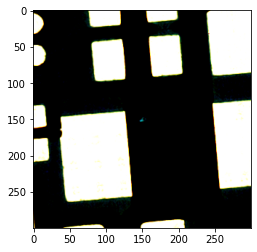

In [4]:
import keras
import matplotlib.pyplot as plt
%matplotlib inline

aug_xtrain = aug_xtrain.astype('float32')
print(np.max(aug_xtrain),np.max(aug_ytrain))
print(np.min(aug_xtrain),np.min(aug_ytrain))

mean = np.mean(aug_xtrain)
std = np.std(aug_xtrain)

print(mean)
print(std)

aug_xtrain = aug_xtrain - mean
aug_xtrain = aug_xtrain/std

print(np.max(aug_xtrain),np.max(aug_ytrain))
print(np.min(aug_xtrain),np.min(aug_ytrain))
print(aug_xtrain)

plt.imshow(aug_xtrain[149] , cmap='gray')

In [5]:
from keras.utils import to_categorical
aug_ytrain = to_categorical(aug_ytrain)
print(aug_ytrain[149])

[1. 0.]


In [0]:
import tensorflow as tf

In [0]:
#import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import models
from tensorflow.keras import layers

In [0]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(aug_xtrain , aug_ytrain , test_size=0.25)

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(16,(5,5), input_shape=(300,300,3) , activation='relu' ,strides=(2,2) , padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2) , strides=(2,2)))


model.add(layers.Conv2D(16, (5,5),activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))


model.add(layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      1216      
_________________________________________________________________
average_pooling2d (AveragePo (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 70, 70, 16)        6416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 35, 35, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 19600)             0         
_________________________________________________________________
dense (Dense)                (None, 120)               2352120   
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [10]:
#model.compile(optimizer=keras.optimizers.SGD(),  # Optimizer
              # Loss function to minimize
              #loss ='mean_squared_error',
 #             loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              # List of metrics to monitor
  #            metrics=['sparse_categorical_accuracy'])
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

history=model.fit(X_train,y_train , batch_size=256 , epochs=20 , verbose=1)

Epoch 1/20
15/15 [==============================] - 40s 3s/step - loss: 0.6086 - accuracy: 0.6791
Epoch 2/20
15/15 [==============================] - 41s 3s/step - loss: 0.4860 - accuracy: 0.7812
Epoch 3/20
15/15 [==============================] - 41s 3s/step - loss: 0.3620 - accuracy: 0.8587
Epoch 4/20
15/15 [==============================] - 40s 3s/step - loss: 0.3269 - accuracy: 0.8720
Epoch 5/20
15/15 [==============================] - 40s 3s/step - loss: 0.2901 - accuracy: 0.8873
Epoch 6/20
15/15 [==============================] - 41s 3s/step - loss: 0.2341 - accuracy: 0.9132
Epoch 7/20
15/15 [==============================] - 41s 3s/step - loss: 0.2269 - accuracy: 0.9148
Epoch 8/20
15/15 [==============================] - 41s 3s/step - loss: 0.2128 - accuracy: 0.9148
Epoch 9/20
15/15 [==============================] - 41s 3s/step - loss: 0.1659 - accuracy: 0.9333
Epoch 10/20
15/15 [==============================] - 41s 3s/step - loss: 0.1442 - accuracy: 0.9476
Epoch 11/20
15/15 [

In [11]:
test_loss , test_acc = model.evaluate(X_test,y_test)
print("Test loss : ",test_loss)
print("Test Accuracy : ",test_acc)

40/40 [==============================] - 4s 107ms/step - loss: 0.1363 - accuracy: 0.9492
Test loss :  0.13625763356685638
Test Accuracy :  0.9492063522338867


In [12]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred , axis=1)
target_names = ['class 0','class 1']
print(classification_report(np.argmax(y_test , axis=1) , y_pred , target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.92      0.98      0.95       637
     class 1       0.98      0.91      0.95       623

    accuracy                           0.95      1260
   macro avg       0.95      0.95      0.95      1260
weighted avg       0.95      0.95      0.95      1260

